## Statistics: The Science of Decisions Project Instruction

### Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

- Variables
 * Independent variable = the congruence of the words and colors.
 * Dependent variable = the time it takes to name the colors in equally-sized lists.
 
Let mean of congruent words condition = $\mu_c$ and mean of incongruent condition = $\mu_i$

- Hyphothesis
  * H<sub>o</sub> : $\mu_c = \mu_i$
  * H<sub>a</sub> : $\mu_c \neq \mu_i$

- Test to conduct
  * I will conduct a Dependent t-test for paired samples. This test is chosen because each subject takes the test twice, i.e. has been assigned two conditions in random order.

In [1]:
# import all packages and functions
import csv
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from IPython.display import display
from data_vis import cent_td_stats, variability_stats
from data_plots import congruent_plot, incongruent_plot

%matplotlib inline


In [2]:
test_average_data = pd.read_csv('test_averages.csv')

#sort values

arr = test_average_data.values
#dependent samples should not be sorted.
#arr.sort(axis=0)
sorted_df = pd.DataFrame(arr, index=test_average_data.index, columns=test_average_data.columns)

display(test_average_data)
mu = sorted_df.mean()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


### measures of central tendency -> mean & median

In [3]:
cent_td_stats(sorted_df)

mean for congruent population : 14.051125
mean for incongruent population:  22.0159166667
median for congruent population : 14.3565
median for incongruent population:  21.0175


The $\mu_c \approx $ median of congruent population making it a normal distribution, however $\mu_i$ < median of incongruent population. This indicates that the incongruent population may contain outliers drawing the mean away from the median.

### standard deviation

In [4]:
variability_stats(sorted_df)

SD for congruent population : 3.55935795765
SD for incongruent population:  4.79705712247


### visualisations

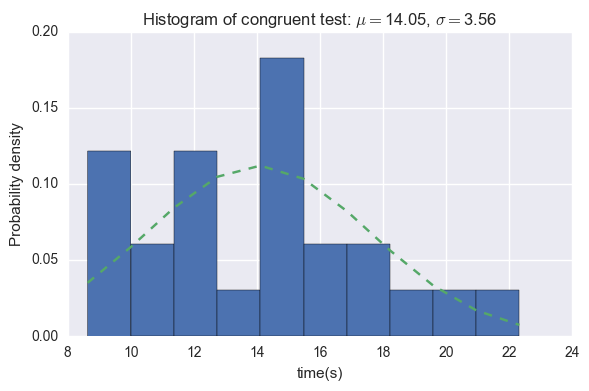

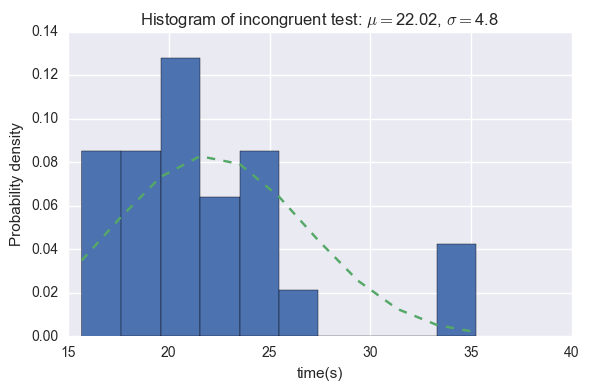

In [5]:
congruent_plot(sorted_df)

incongruent_plot(sorted_df)    

The plot for the incongruent test shows that 23rd value is an outlier as it unexpectedly differs from the other values  and as a result this plot varies more compared with the plot for the congruent test

## statistical tests

point estimate(PE) = $\mu_c - \mu_i$ 

$\alpha = 0.05$


In [6]:
#point estimate  or mean difference
pe = mu.Congruent - mu.Incongruent
print('point estimate is ' + str(pe))

point estimate is -7.96479166667


In [7]:
# SD of differences = sum of square of differences / n - 1
data_for_sd = pd.read_csv('test_averages_for_sd.csv')

sd = math.sqrt(data_for_sd.sum().squared_mean_difference / 23)
sd = round(sd, 4)
print(r'SD of differences = ' + str(sd))

SD of differences = 4.8648


#### t-statistic
## $[t_{stat} = \frac{\mu_c - \mu_i}{s /\sqrt {n}} ]$

In [8]:
t = pe /((sd)/math.sqrt(24))
print('t-statistic is ' + str(t))

t-statistic is -8.02075131183


#### t-critical ($\alpha = 0.05$)

##### from the t-table
### $t_{critical} = \scriptstyle\pm 2.069$



Confidence Interval (CI)

CI = ($M_D - t_{critical}(S_D)/\sqrt{n}, M_D + t_{critical}(S_D)/\sqrt{n} $)

In [10]:
lower_bound = pe - (2.069 * (sd/math.sqrt(24)))
upper_bound = pe + (2.069 * (sd/math.sqrt(24)))
print('confidence interval (CI) = ' + str(round(lower_bound, 2)) + ',   ' + str(round(upper_bound, 2)))
print('This means that on average the participant will take between 10 to 5 seconds less time in the congruent word test than in the incongruent one.')

confidence interval (CI) = -10.02,   -5.91
This means that on average the participant will take between 10 to 5 seconds less time in the congruent word test than in the incongruent one.


## Conclusion
Since our $t_{stat}$ is passed the critical value in the critical region, we'll reject the null hypothesis $H_o$. This means that the participants spent significantly more time with the incongruent words as compared to the congruent words. Since this was an experimental design, we can make causal statements, so we can say that the congruence of the words and colors had a causal effect on the duration of naming all the colors.